# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [5]:
# Import essential libraries for data manipulation and analysis
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Library for date and time manipulation
import datetime as dt

#Libraries for machine learning tools. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

/Users/yoezeljai/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [8]:
# Importing the file porter_data_1.csv
df=pd.read_csv('/Users/yoezeljai/Desktop/DS Anal/Machine Learning/ML Assignment - Delivery_Starter/porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [13]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at']=pd.to_datetime(df['created_at'])
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])
df[['created_at','actual_delivery_time']].dtypes


created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [16]:
# Convert categorical features to category type
categorical_cols=['store_primary_category','order_protocol']
for col in categorical_cols:
    df[col]=df[col].astype('category')

df[categorical_cols].dtypes


store_primary_category    category
order_protocol            category
dtype: object

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [20]:
# Calculate time taken in minutes
df['delivery_duration_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Extracting hour and day of week from 'created_at'
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek  # Monday=0, Sunday=6

# Displaying the first few rows to confirm
df[['created_at', 'actual_delivery_time', 'delivery_duration_minutes', 'order_hour', 'order_dayofweek']].head()


created_at actual_delivery_time  delivery_duration_minutes  \
0 2015-02-06 22:24:17  2015-02-06 23:11:17                       47.0   
1 2015-02-10 21:49:25  2015-02-10 22:33:25                       44.0   
2 2015-02-16 00:11:35  2015-02-16 01:06:35                       55.0   
3 2015-02-12 03:36:46  2015-02-12 04:35:46                       59.0   
4 2015-01-27 02:12:36  2015-01-27 02:58:36                       46.0   

   order_hour  order_dayofweek  
0          22                4  
1          21                1  
2           0                0  
3           3                3  
4           2                1

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [23]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek  # Monday = 0, Sunday = 6

# Displaying the updated DataFrame
df[['order_hour', 'order_dayofweek']].head()


order_hour  order_dayofweek
0          22                4
1          21                1
2           0                0
3           3                3
4           2                1

In [25]:
#Create a categorical feature 'isWeekend'
# Created 'isWeekend' column: 1 if Saturday or Sunday, else 0
df['isWeekend'] = df['order_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# Converted to categorical type
df['isWeekend'] = df['isWeekend'].astype('category')

# Displaying the result
df[['order_dayofweek', 'isWeekend']].head()

order_dayofweek isWeekend
0                4         0
1                1         0
2                0         0
3                3         0
4                1         0

In [27]:
# Drop unnecessary columns
# Droping the original timestamp columns as they're no longer needed
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [31]:
# Define target variable (y) and features (X)
y = df['delivery_duration_minutes']
X = df.drop(columns=['delivery_duration_minutes'])


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirming the sizes
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Calculating and displaying the sizes in percentage\
total_samples = len(df)
train_pct = (len(X_train) / total_samples) * 100
test_pct = (len(X_test) / total_samples) * 100

print(f"Training set: {train_pct:.2f}%")
print(f"Testing set: {test_pct:.2f}%")

Training samples: 140621
Testing samples: 35156
Training set: 80.00%
Testing set: 20.00%


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [38]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Automatically identify numerical columns (integers and floats)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Automatically identify categorical columns (type: category or object)
categorical_cols = X_train.select_dtypes(include=['category', 'object']).columns.tolist()

# Displaying the lists
print("Numerical Columns:\n", numerical_cols)
print("\nCategorical Columns:\n", categorical_cols)


Numerical Columns:
 ['market_id', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

Categorical Columns:
 ['store_primary_category', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

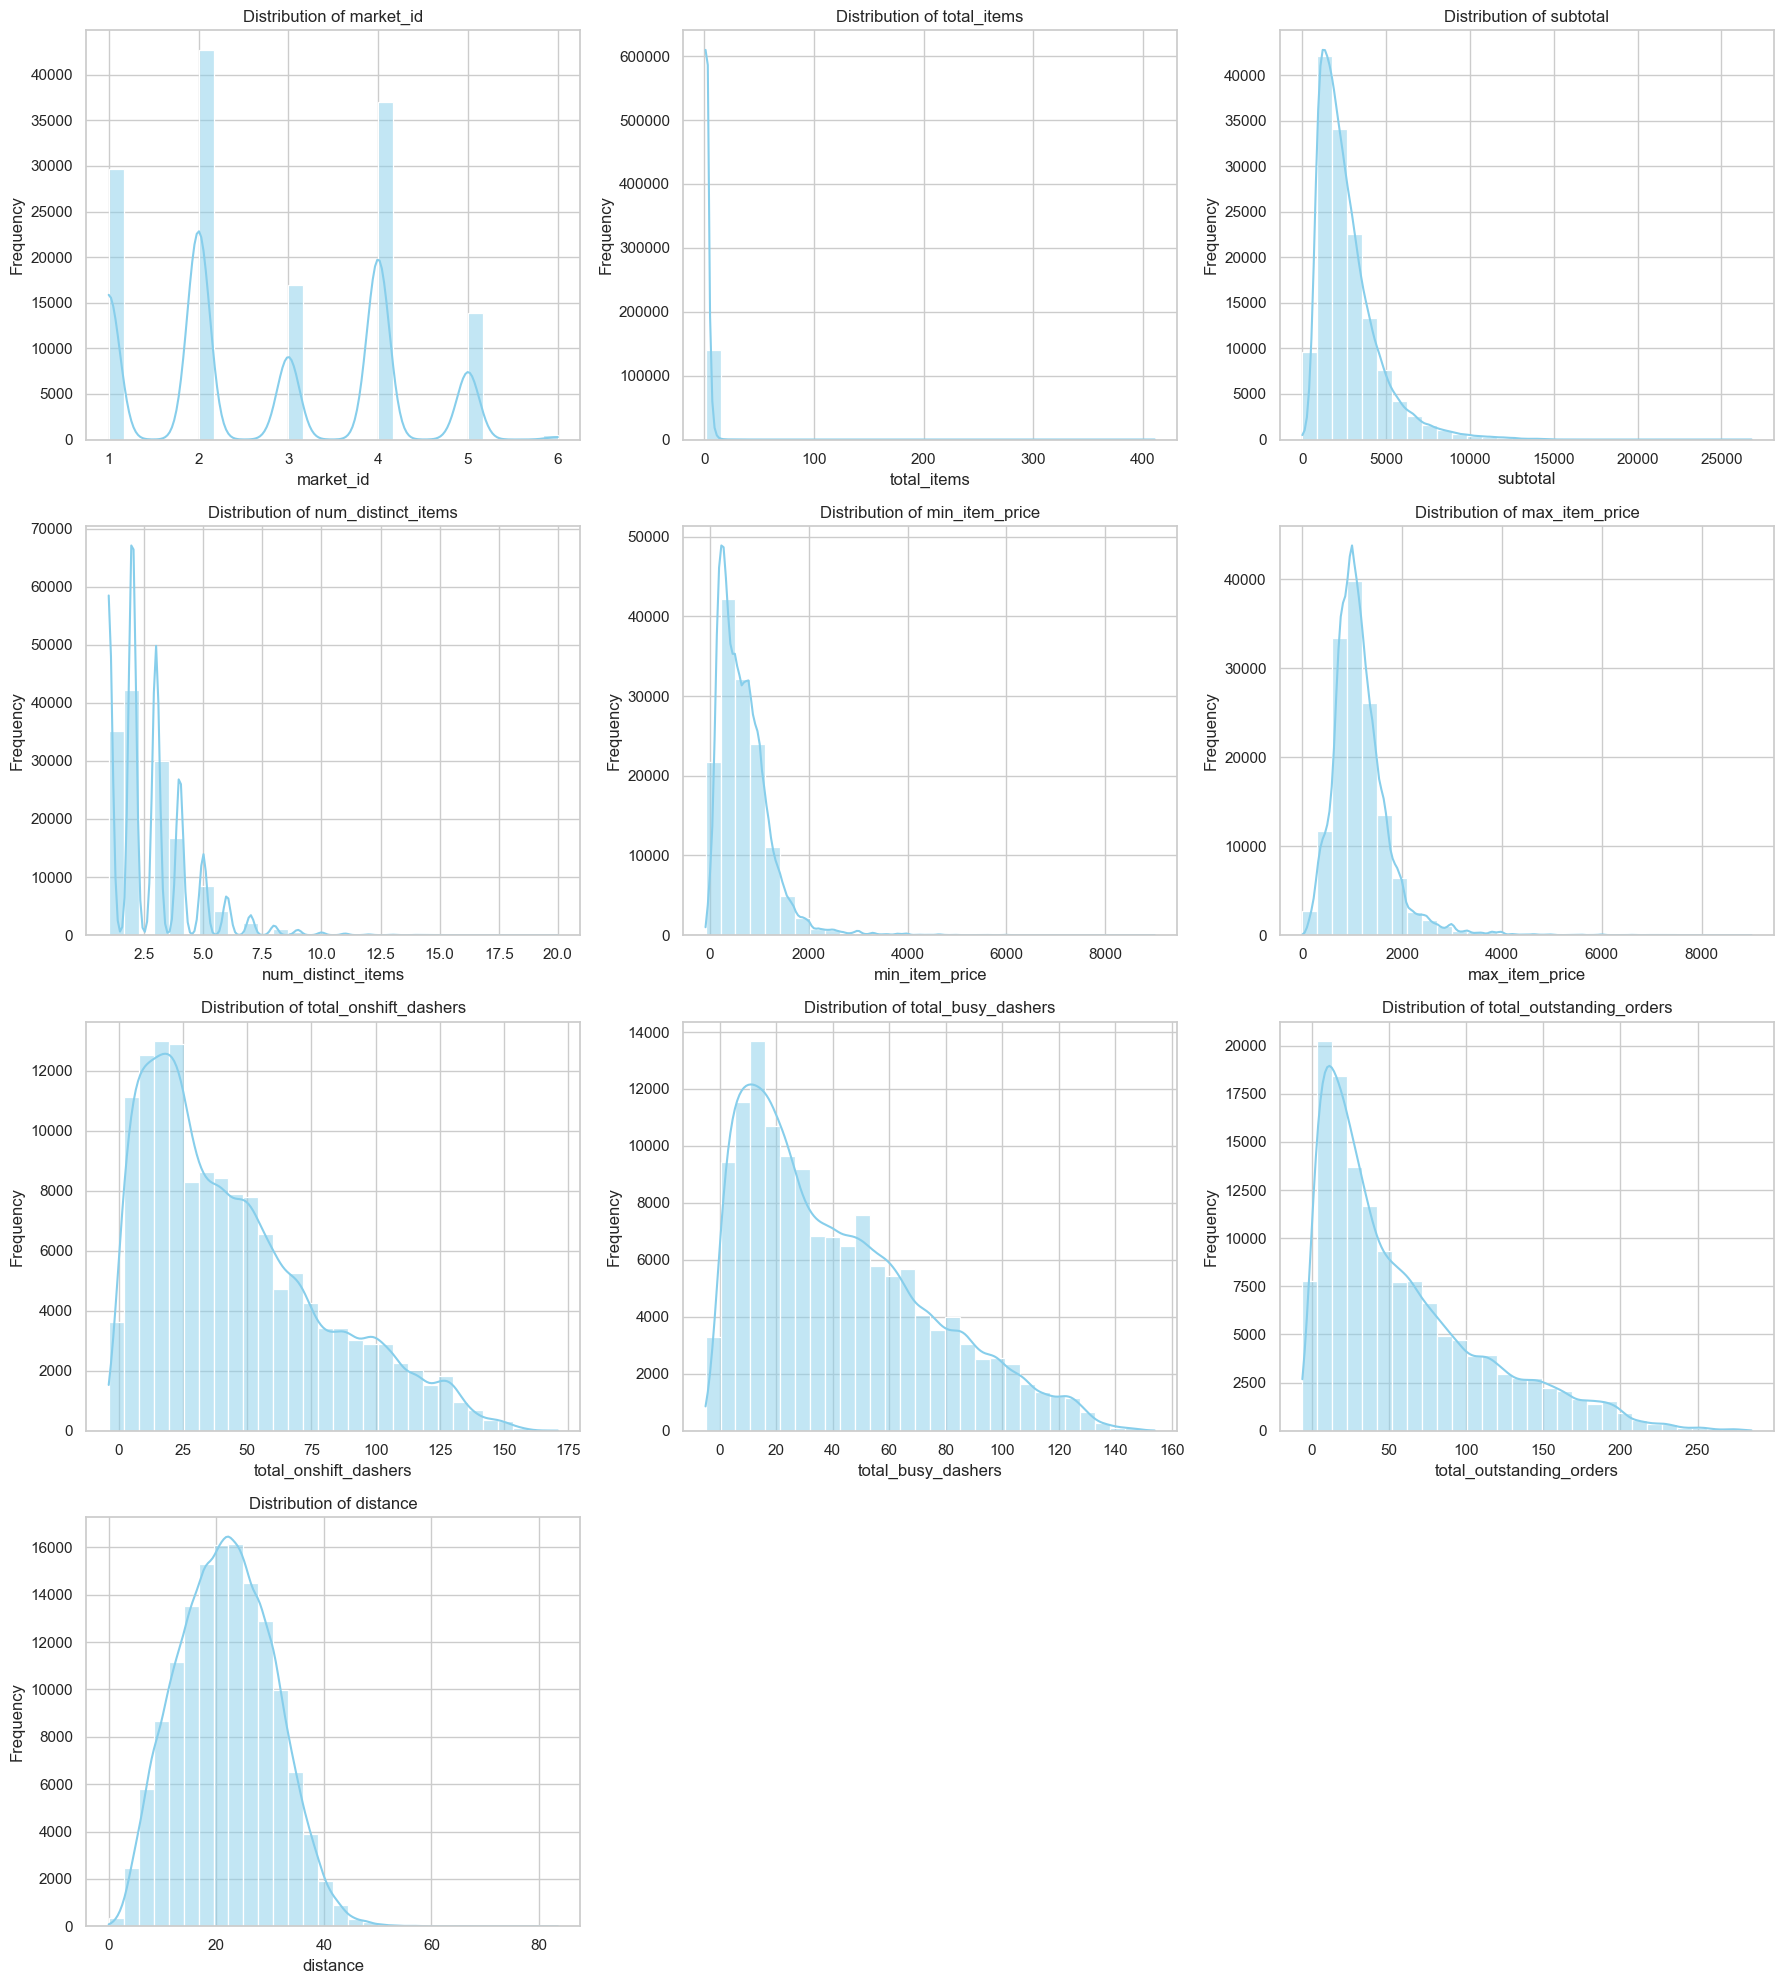

In [41]:
# Plot distributions for all numerical columns
# Setting plot style
sns.set(style="whitegrid")

# Number of plots = number of numerical columns
n_cols = len(numerical_cols)
n_rows = (n_cols // 3) + int(n_cols % 3 > 0)

# Creating subplots
plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, 3, i + 1)
    sns.histplot(X_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features


Distribution in 'store_primary_category':
store_primary_category
4     14483
55    12603
46    12427
13     7907
58     7227
      ...  
1         7
43        6
3         1
8         1
21        0
Name: count, Length: 73, dtype: int64

Distribution in 'order_protocol':
order_protocol
1.0    38746
3.0    37674
5.0    33118
2.0    16689
4.0    13842
6.0      534
7.0       18
Name: count, dtype: int64

Distribution in 'isWeekend':
isWeekend
0    92042
1    48579
Name: count, dtype: int64


/var/folders/f9/gzgwq0014hbgzwvqc1cwp7cc0000gn/T/ipykernel_46660/1110011589.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X_train[col],palette="pastel", legend=False)
/var/folders/f9/gzgwq0014hbgzwvqc1cwp7cc0000gn/T/ipykernel_46660/1110011589.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X_train[col],palette="pastel", legend=False)
/var/folders/f9/gzgwq0014hbgzwvqc1cwp7cc0000gn/T/ipykernel_46660/1110011589.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X_train[col],palette="pastel", legend=False)


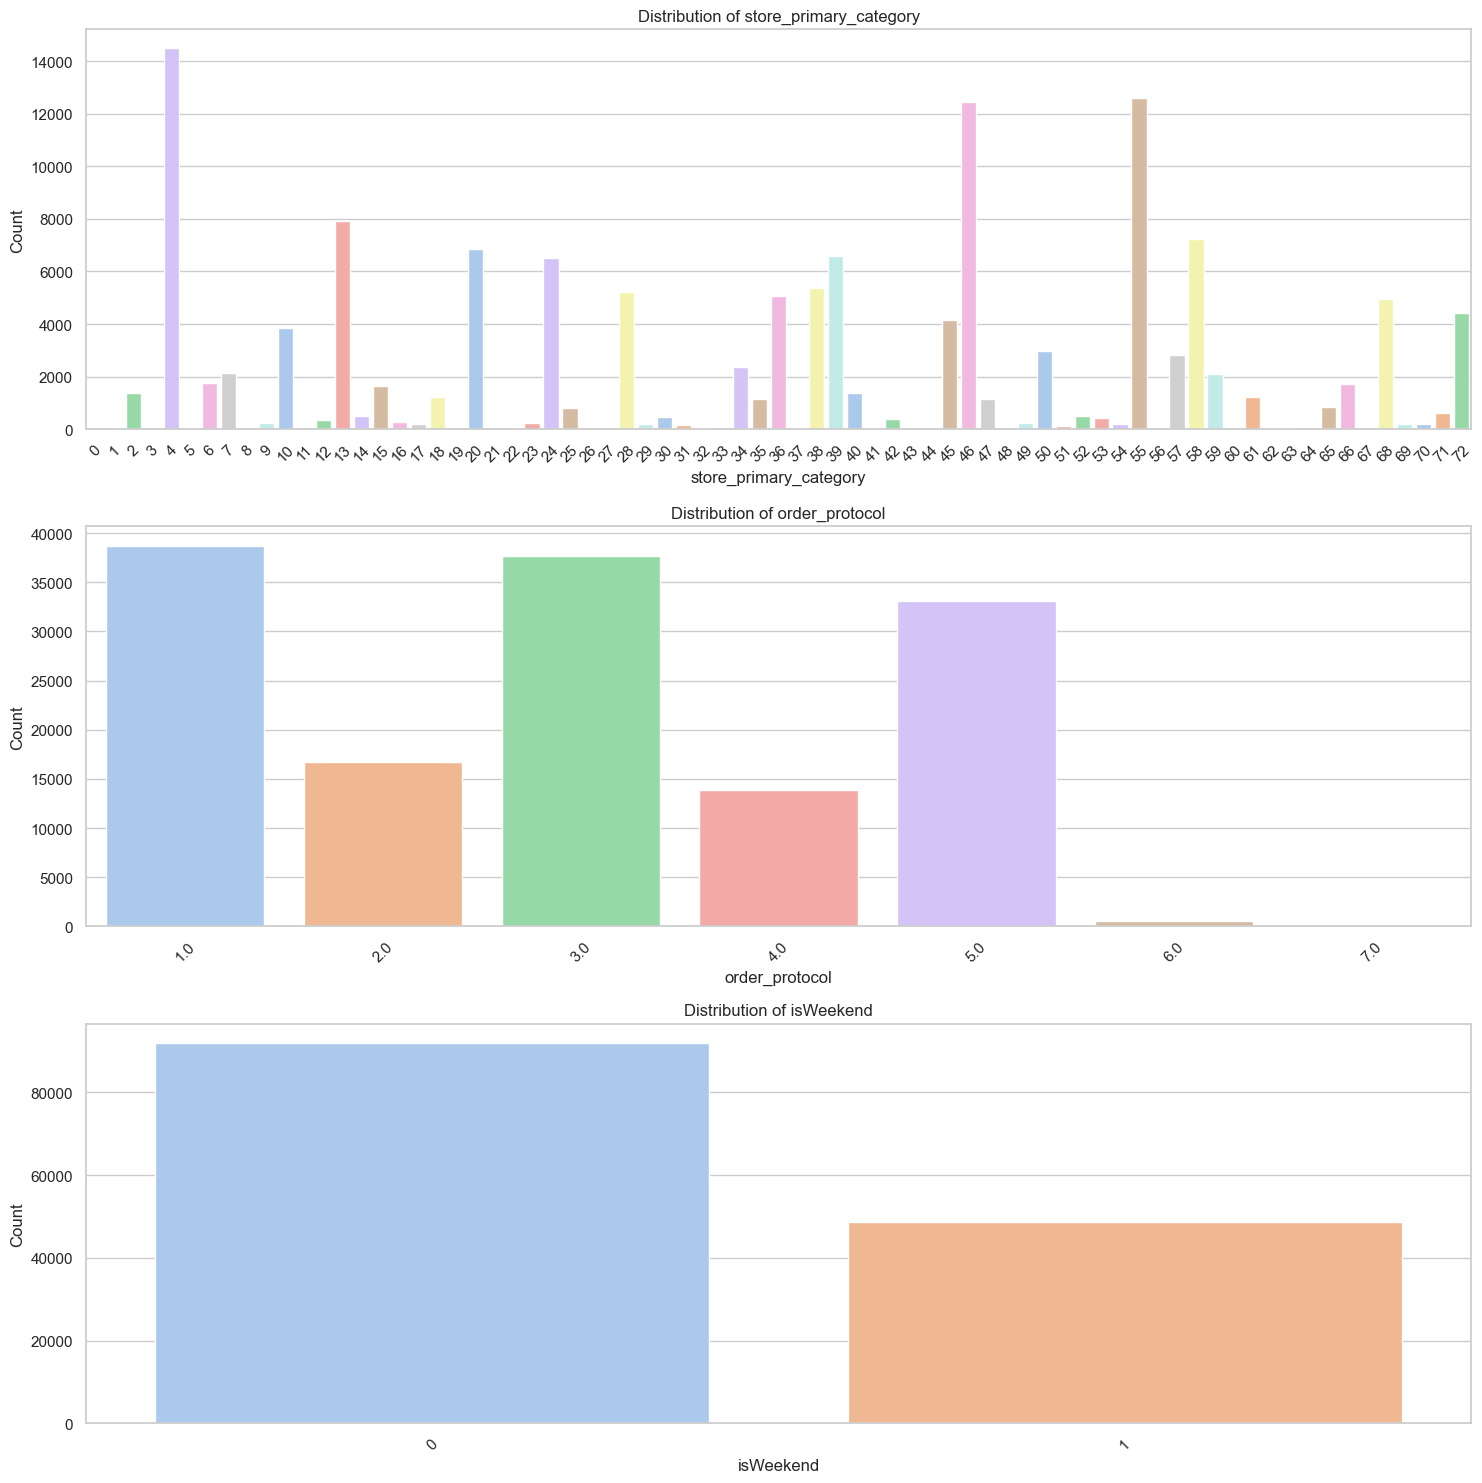

In [47]:
# Distribution of categorical columns
# Displaying value counts for each categorical column
for col in categorical_cols:
    print(f"\nDistribution in '{col}':")
    print(X_train[col].value_counts())

# Setting plot style
sns.set(style="whitegrid")

# Plotting bar charts
plt.figure(figsize=(15, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.countplot(x=X_train[col],palette="pastel", legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

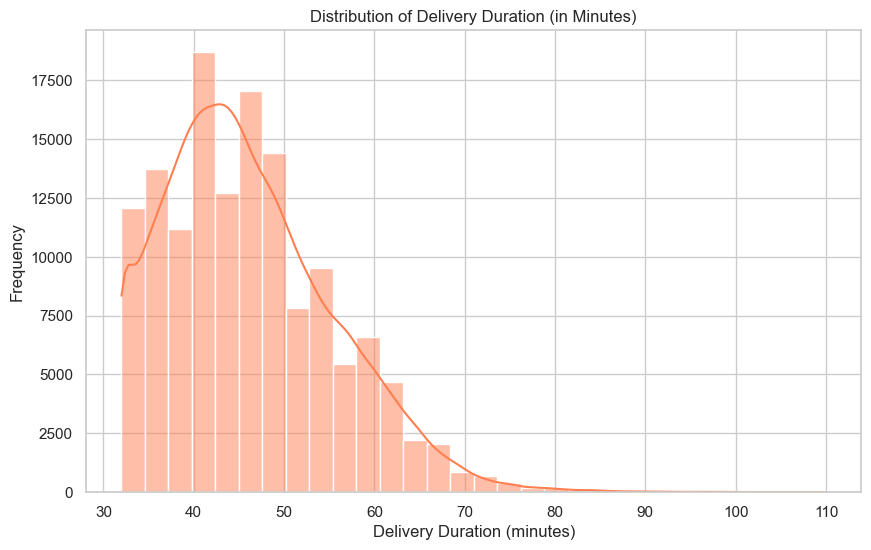

In [50]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=30, kde=True, color='coral')
plt.title('Distribution of Delivery Duration (in Minutes)')
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

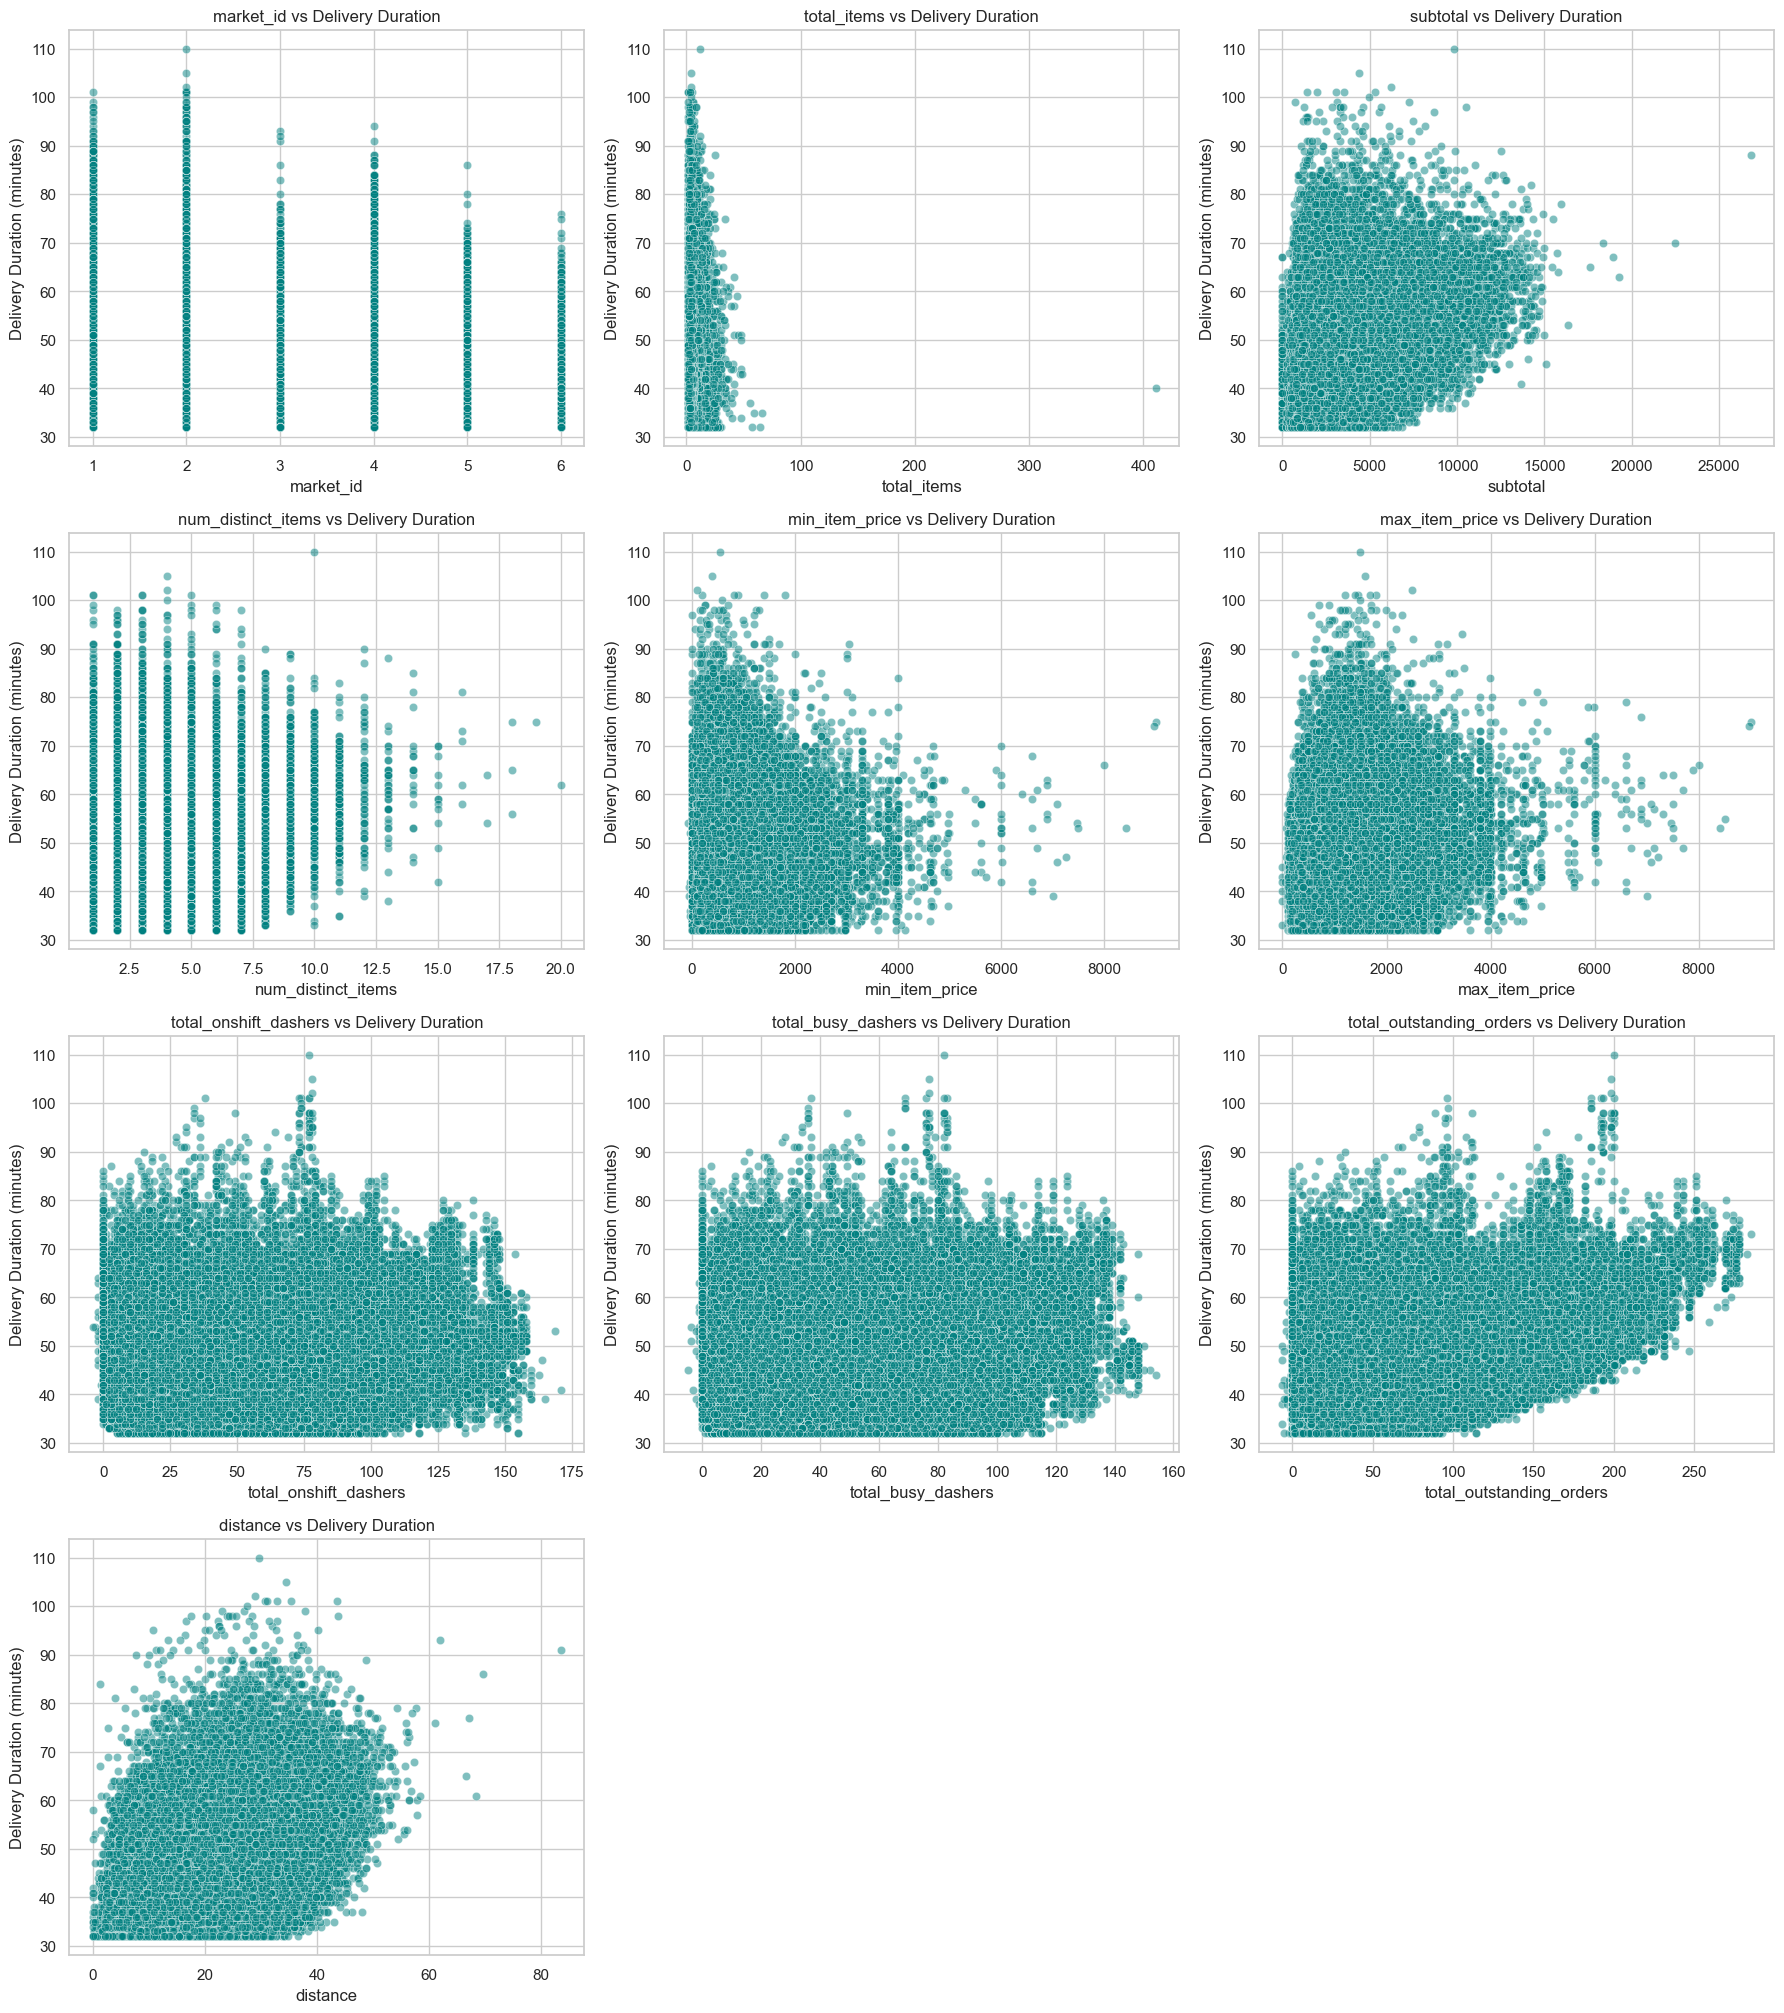

In [54]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(18, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 3, i + 1)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5, color='teal')
    plt.title(f'{col} vs Delivery Duration')
    plt.xlabel(col)
    plt.ylabel('Delivery Duration (minutes)')

plt.tight_layout()
plt.show()

/var/folders/f9/gzgwq0014hbgzwvqc1cwp7cc0000gn/T/ipykernel_46660/3326642408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train['order_hour'], y=y_train, palette='Set3')


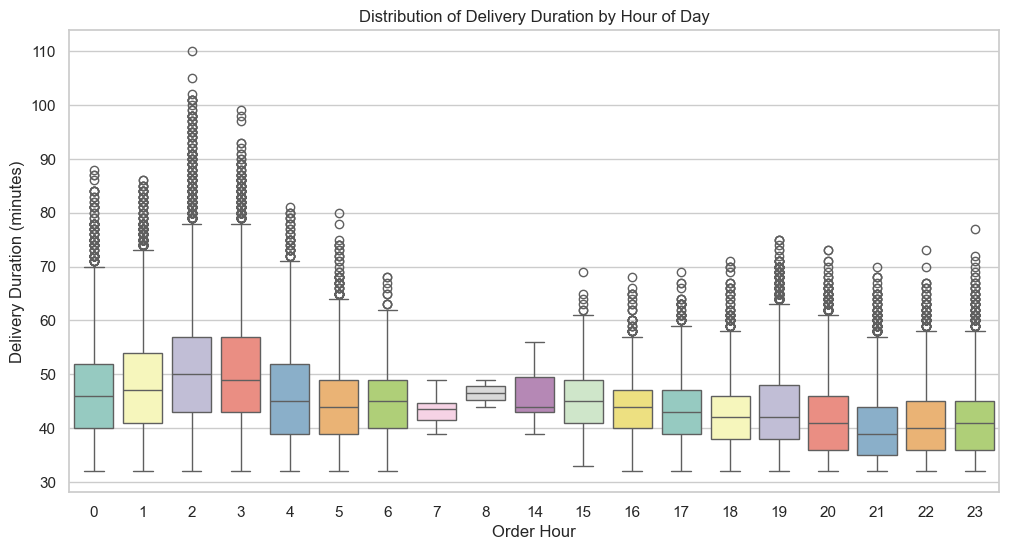

In [56]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train['order_hour'], y=y_train, palette='Set3')
plt.title('Distribution of Delivery Duration by Hour of Day')
plt.xlabel('Order Hour')
plt.ylabel('Delivery Duration (minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

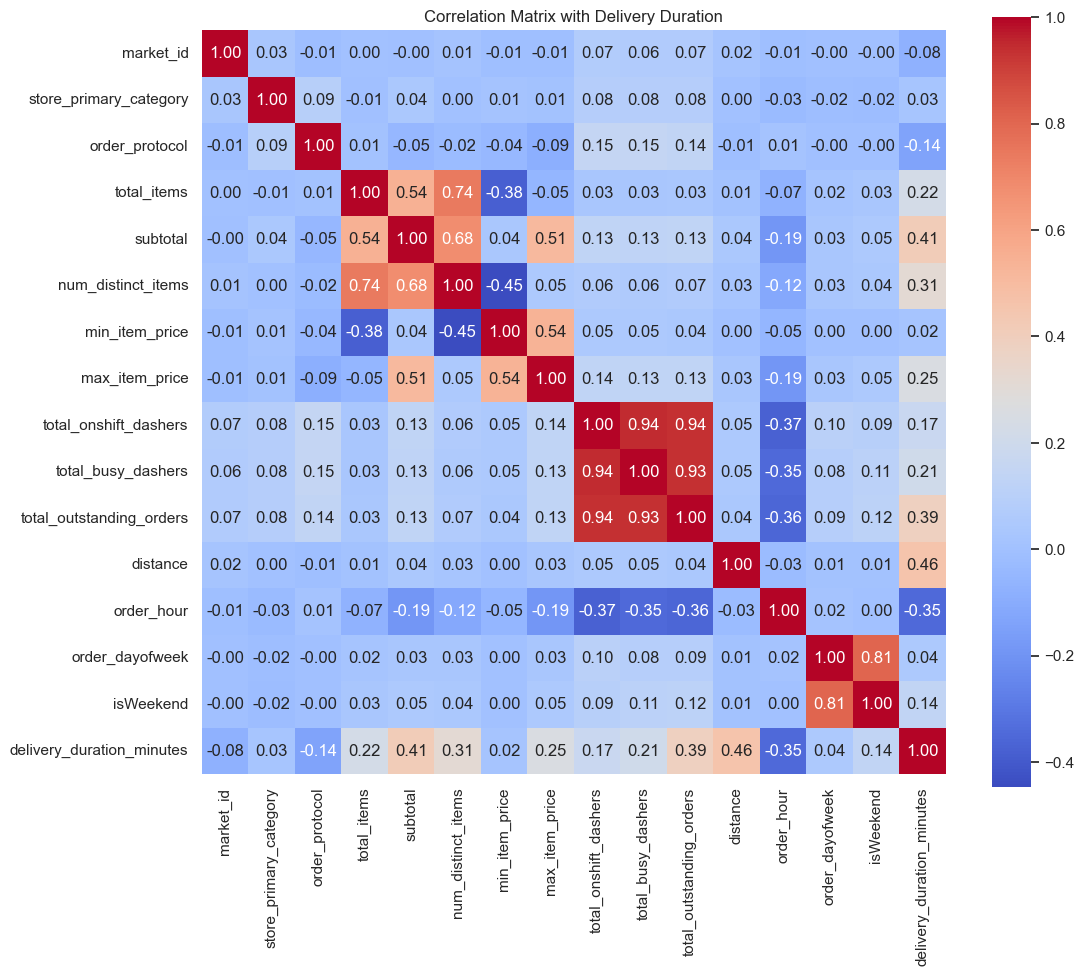

In [60]:
# Plot the heatmap of the correlation matrix
# Creating a DataFrame combining features and target for correlation
train_corr_df = X_train.copy()
train_corr_df['delivery_duration_minutes'] = y_train

plt.figure(figsize=(12, 10))
corr_matrix = train_corr_df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix with Delivery Duration")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [63]:
# Drop 3-5 weakly correlated columns from training dataset
# Computing correlation with the target
correlations = train_corr_df.corr()['delivery_duration_minutes'].drop('delivery_duration_minutes')

# Sorting by absolute correlation
weak_corr = correlations.abs().sort_values()

# Displaying the weakest 5 features
print("Weakly correlated features:\n")
print(weak_corr.head(5))

# Selecting features to drop
features_to_drop = weak_corr.head(5).index.tolist()

# Droping from both training and testing sets
X_train.drop(columns=features_to_drop, inplace=True)
X_test.drop(columns=features_to_drop, inplace=True)

print(f"Dropped features: {features_to_drop}")

Weakly correlated features:

min_item_price            0.021151
store_primary_category    0.026388
order_dayofweek           0.044897
market_id                 0.075067
isWeekend                 0.137057
Name: delivery_duration_minutes, dtype: float64
Dropped features: ['min_item_price', 'store_primary_category', 'order_dayofweek', 'market_id', 'isWeekend']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

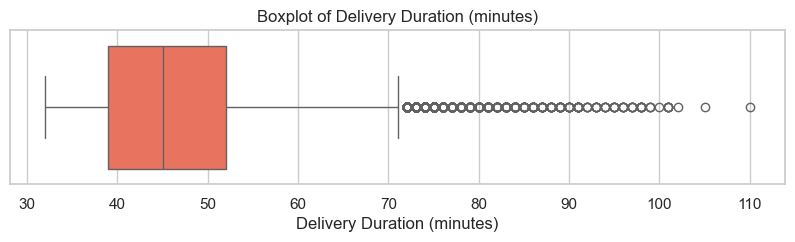

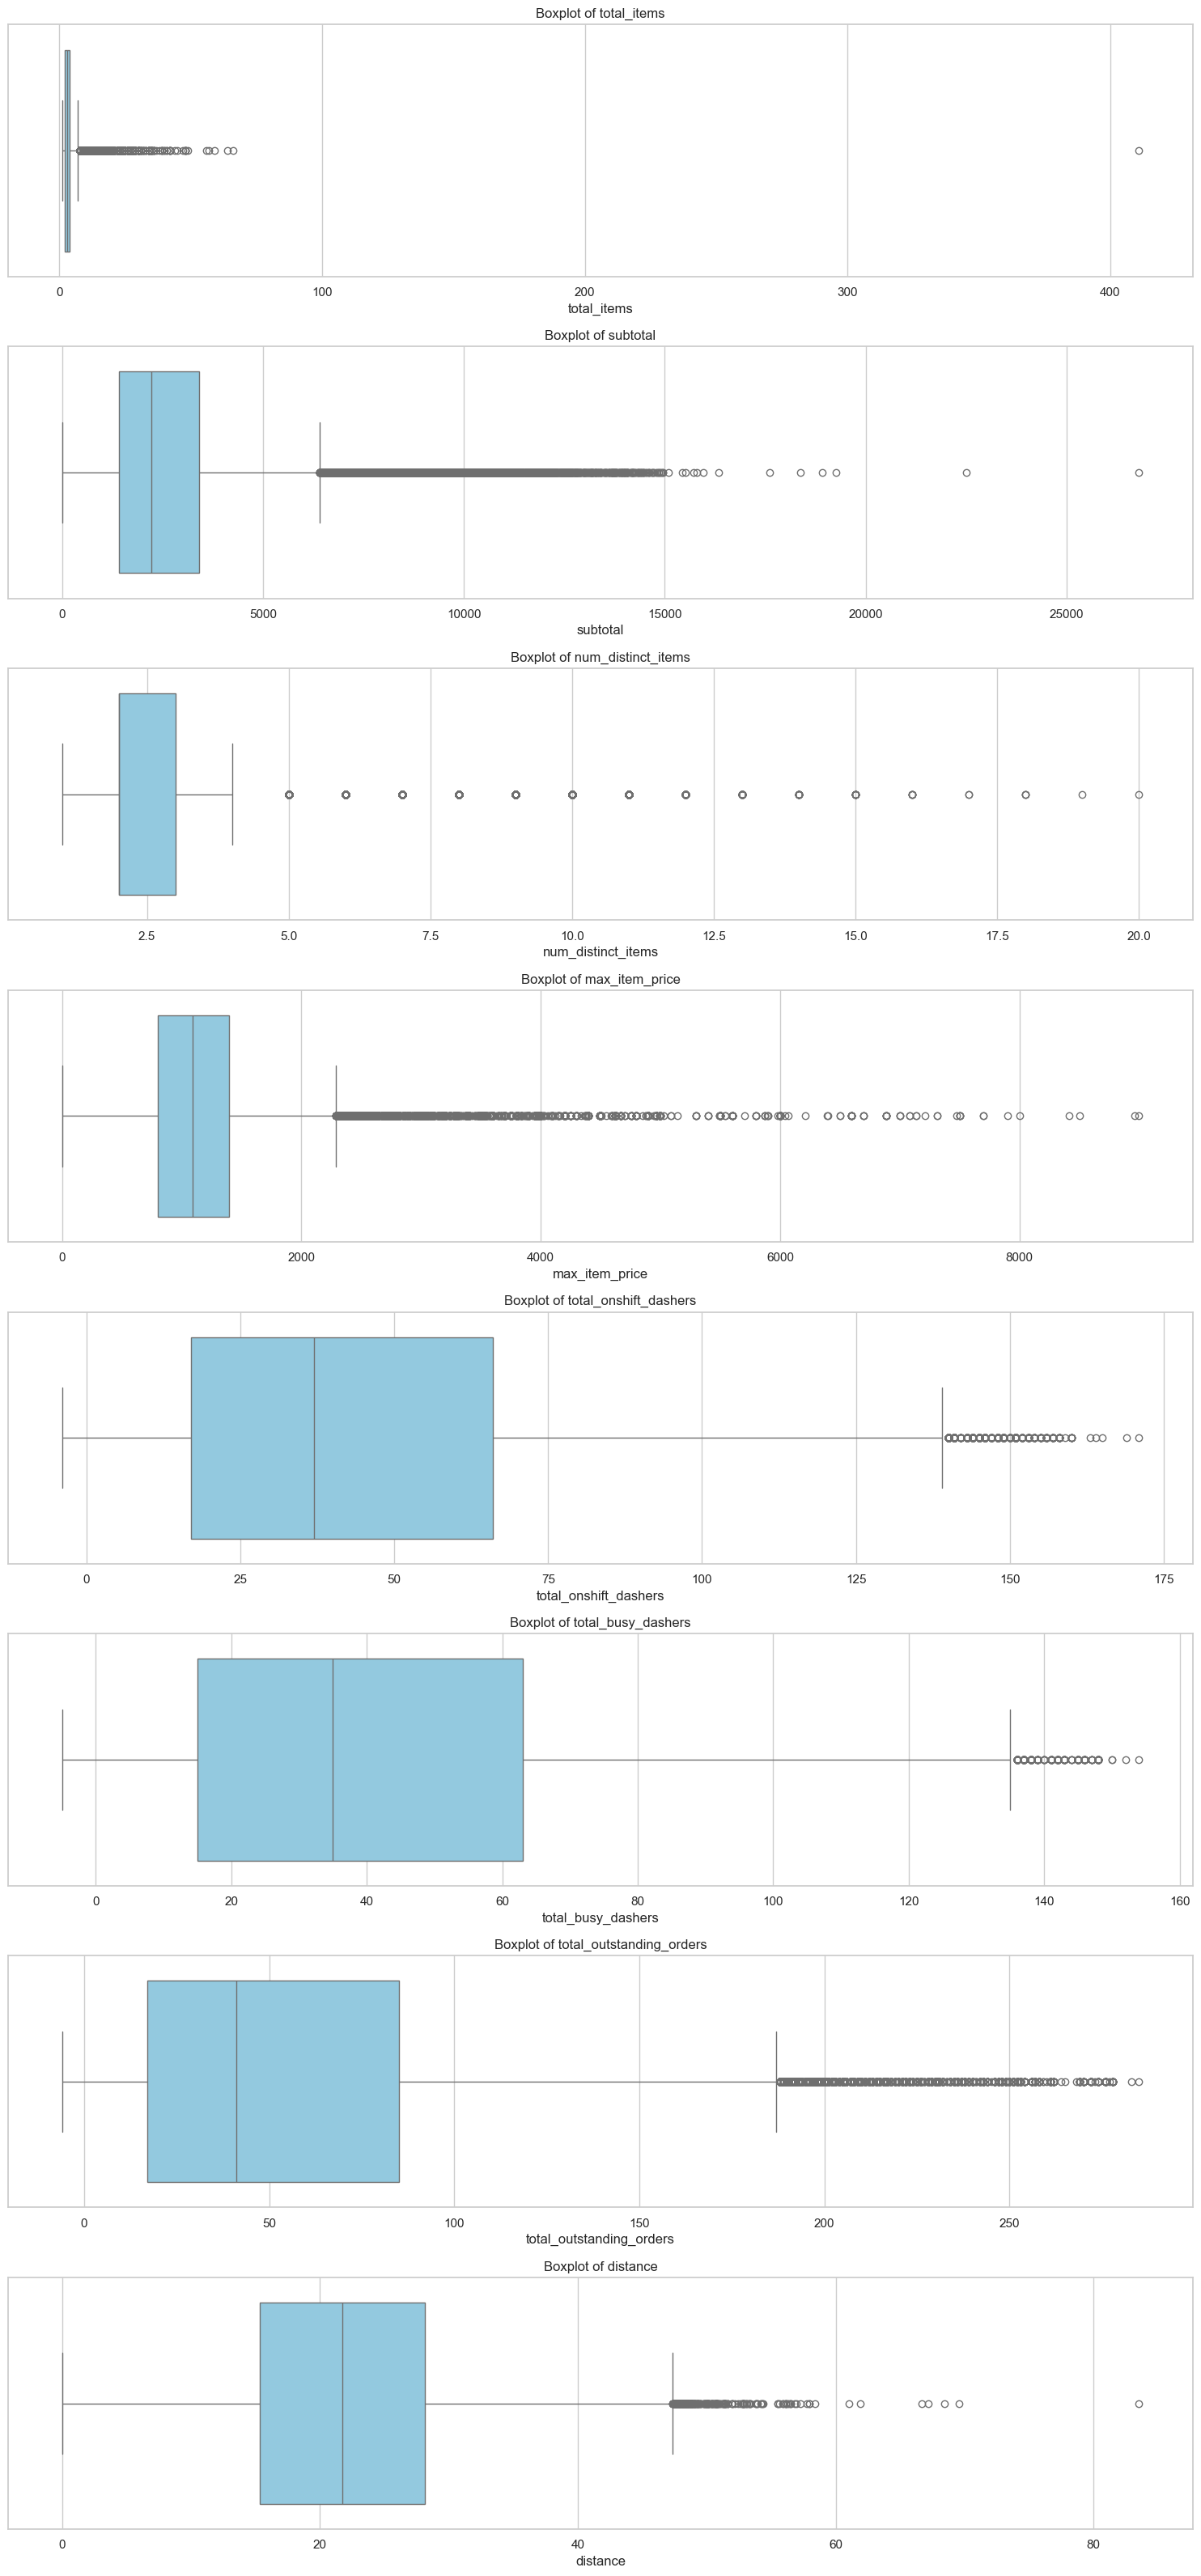

In [67]:
# Boxplot for time_taken
plt.figure(figsize=(10, 2))
sns.boxplot(x=y_train, color='tomato')
plt.title('Boxplot of Delivery Duration (minutes)')
plt.xlabel('Delivery Duration (minutes)')
plt.show()

#Boxplots for all numerical features
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(15, 4 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.boxplot(x=X_train[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [69]:
# Handle outliers
# Defining function to cap outliers using IQR method
def cap_outliers(df, cols):
    df_capped = df.copy()
    for col in cols:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping the values
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
        
    return df_capped

# Appling to both X_train and y_train
X_train = cap_outliers(X_train, numerical_cols)
X_test = cap_outliers(X_test, numerical_cols)

# For the target variable
y_train = y_train.clip(lower=y_train.quantile(0.25) - 1.5 * (y_train.quantile(0.75) - y_train.quantile(0.25)),
                       upper=y_train.quantile(0.75) + 1.5 * (y_train.quantile(0.75) - y_train.quantile(0.25)))

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns: ['order_protocol']


/var/folders/f9/gzgwq0014hbgzwvqc1cwp7cc0000gn/T/ipykernel_46660/2676754091.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[col], label='Train', shade=True)
/var/folders/f9/gzgwq0014hbgzwvqc1cwp7cc0000gn/T/ipykernel_46660/2676754091.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test[col], label='Test', shade=True)
/var/folders/f9/gzgwq0014hbgzwvqc1cwp7cc0000gn/T/ipykernel_46660/2676754091.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[col], label='Train', shade=True)
/var/folders/f9/gzgwq0014hbgzwvqc1cwp7cc0000gn/T/ipykernel_46660/2676754091.py:15: FutureWarning: 

`shade` is now depre

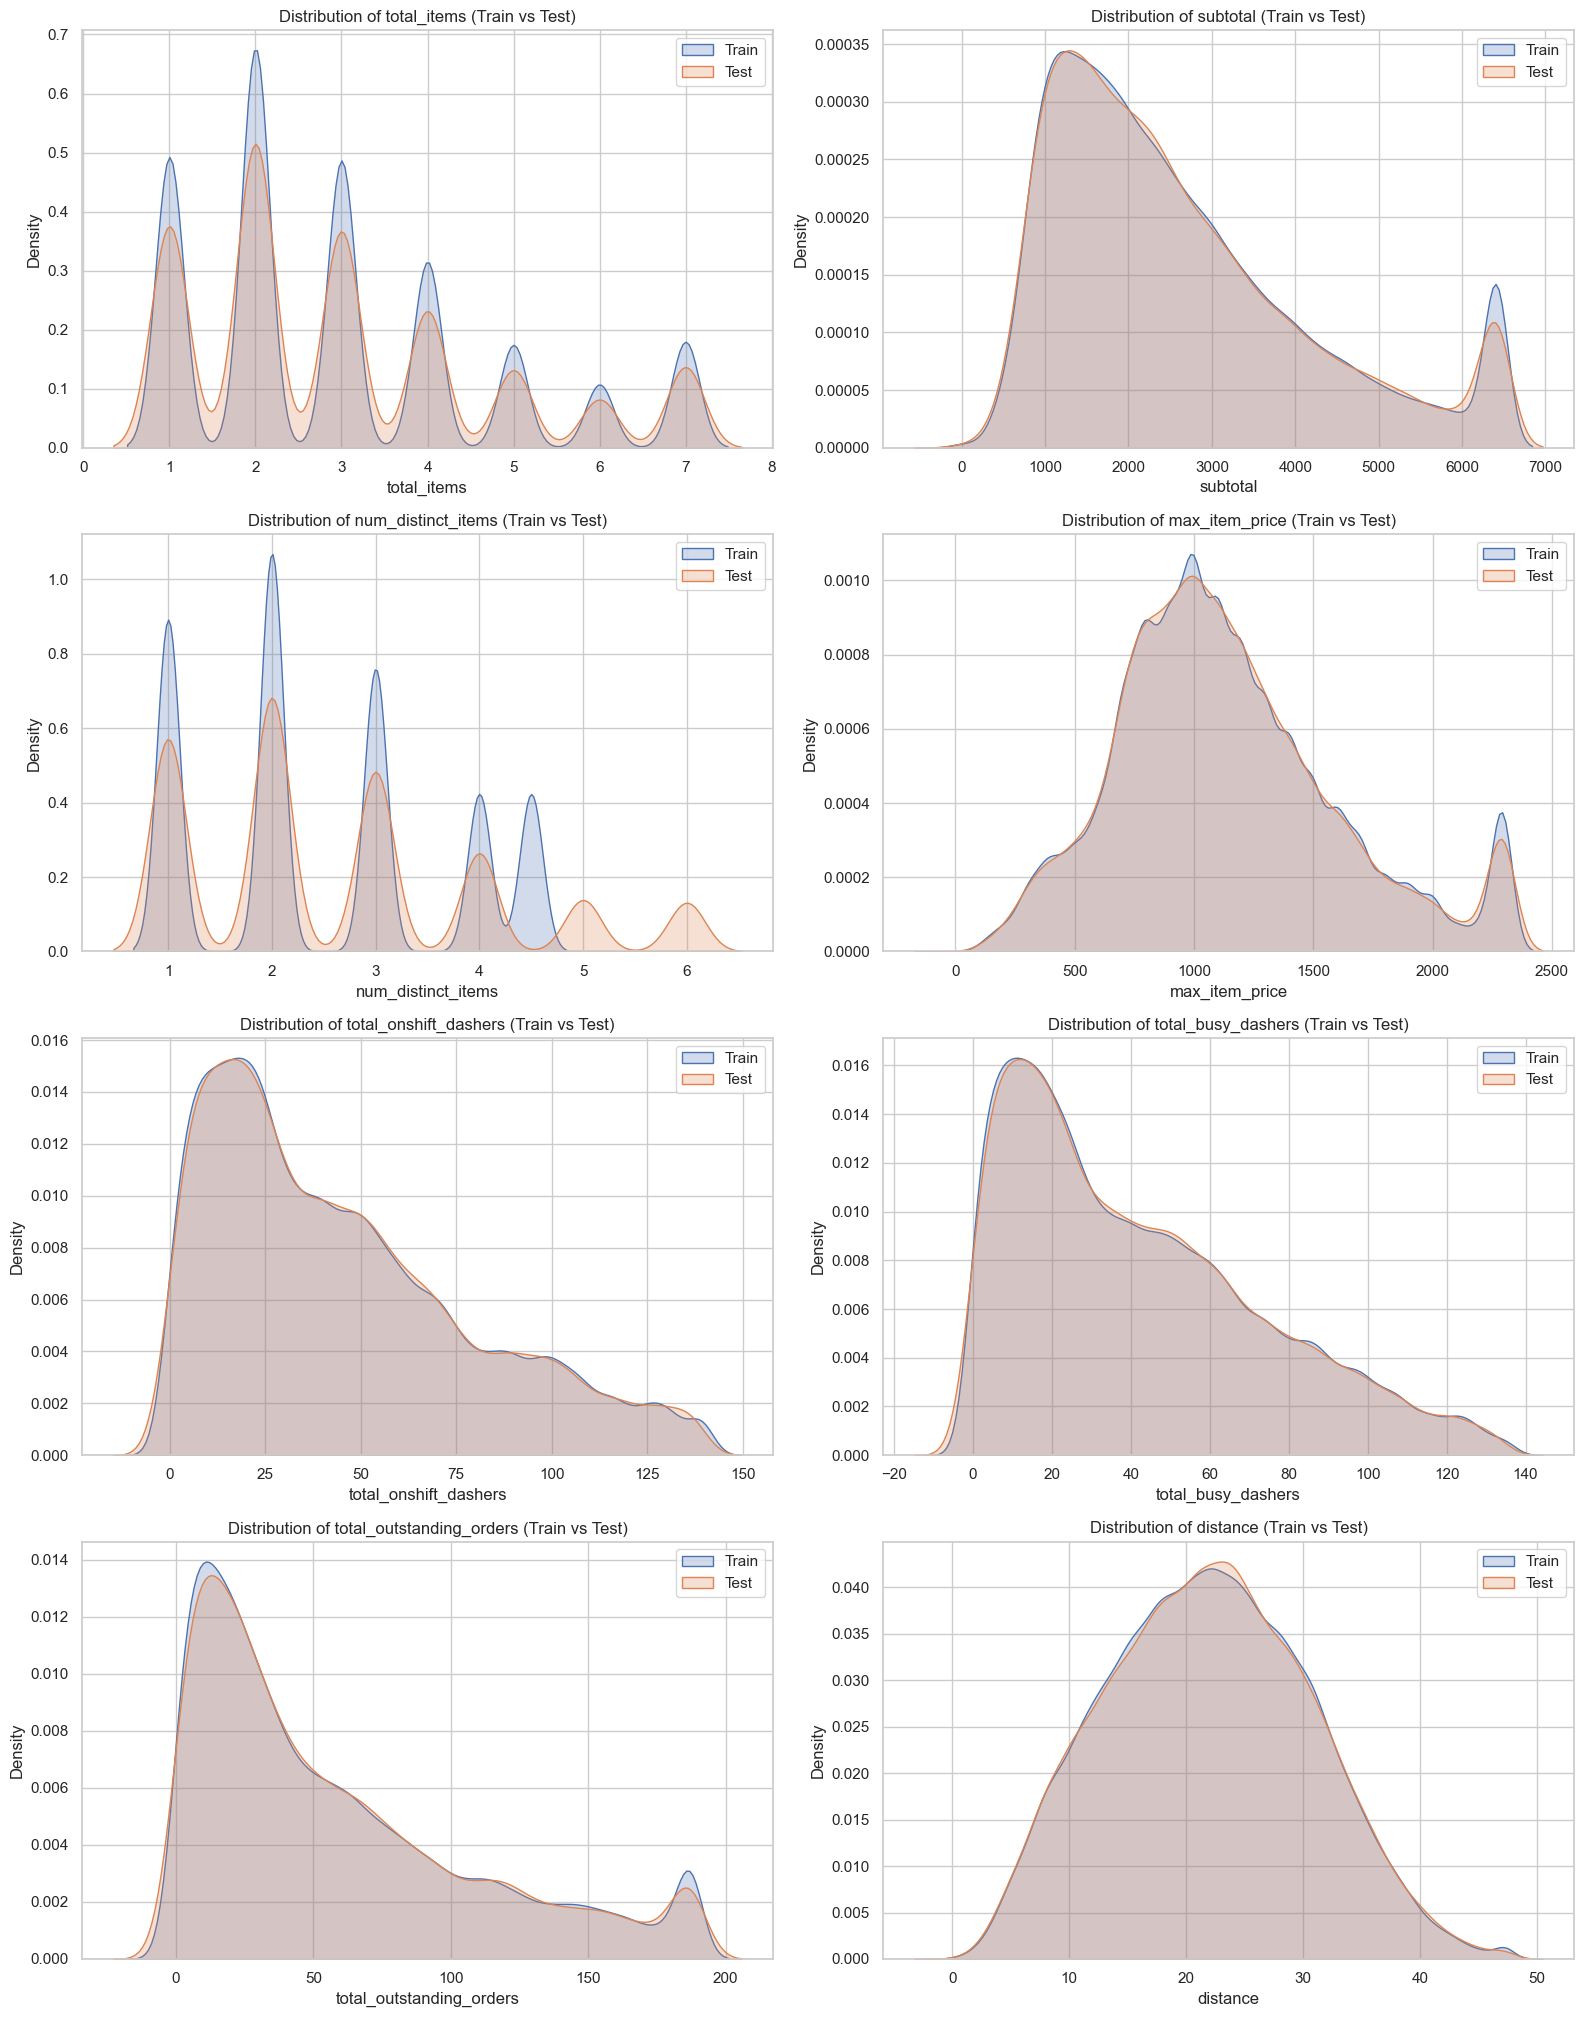

In [73]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Redefining column types based on current dataset
numerical_cols = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_test.select_dtypes(include='category').columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

# Comparing histograms of numerical features: train vs test
plt.figure(figsize=(16, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, i + 1)
    sns.kdeplot(X_train[col], label='Train', shade=True)
    sns.kdeplot(X_test[col], label='Test', shade=True)
    plt.title(f'Distribution of {col} (Train vs Test)')
    plt.legend()

plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

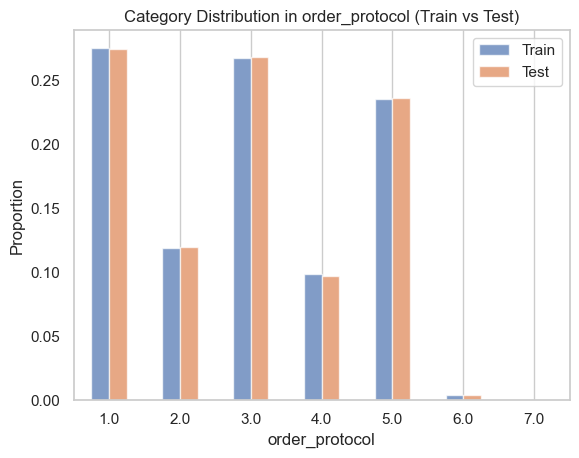

In [74]:
# Bar plots for categorical feature distributions
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    
    train_counts = X_train[col].value_counts(normalize=True).sort_index()
    test_counts = X_test[col].value_counts(normalize=True).sort_index()

    # Combine into a DataFrame for comparison
    comp_df = pd.DataFrame({'Train': train_counts, 'Test': test_counts}).fillna(0)
    comp_df.plot(kind='bar', alpha=0.7)
    plt.title(f'Category Distribution in {col} (Train vs Test)')
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

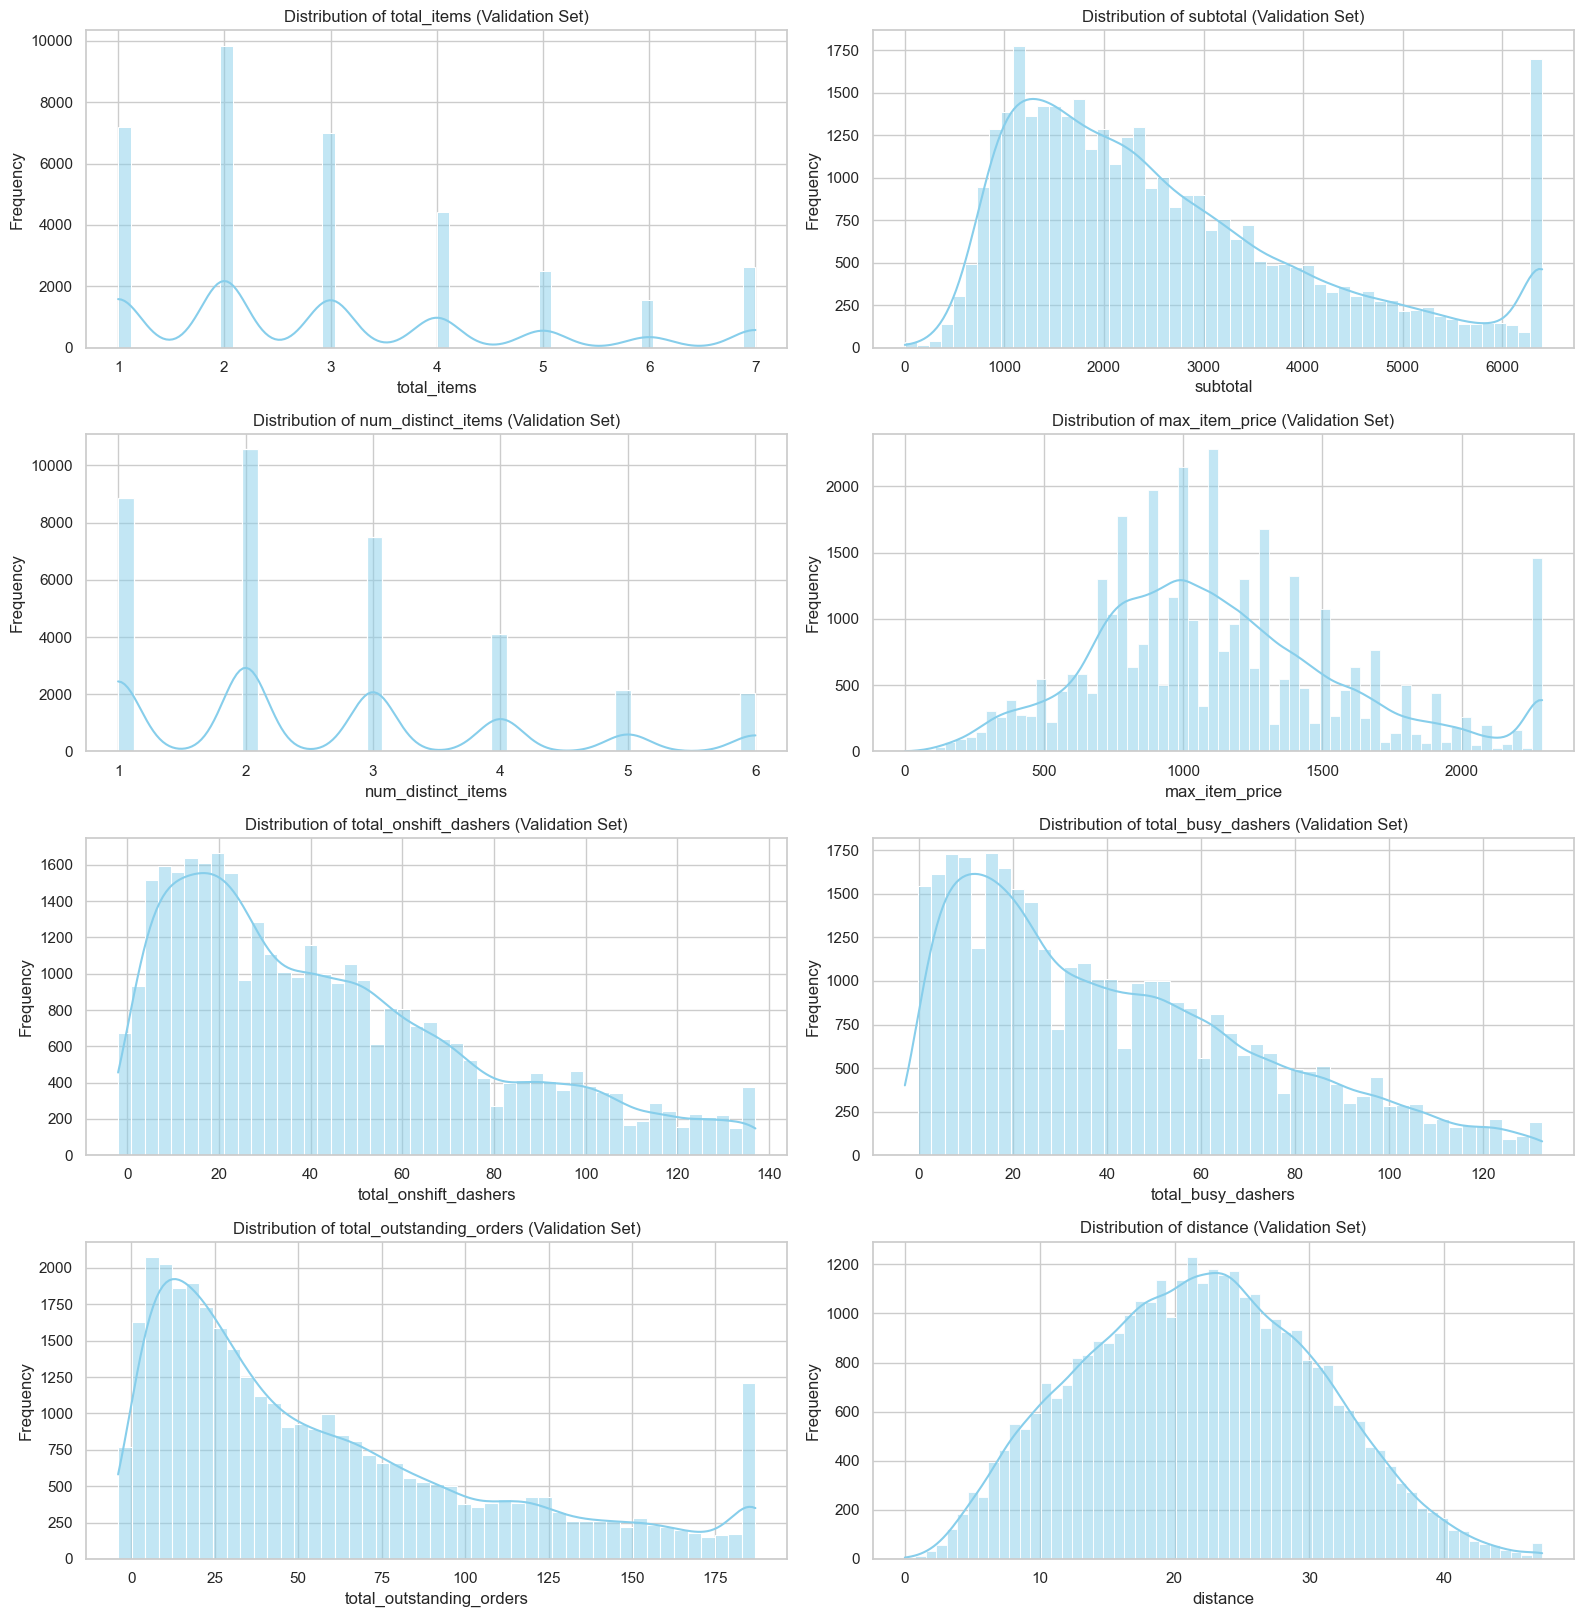

In [79]:
# Plot distributions for all numerical columns
plt.figure(figsize=(16, 4 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, i + 1)
    sns.histplot(X_test[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col} (Validation Set)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

/var/folders/f9/gzgwq0014hbgzwvqc1cwp7cc0000gn/T/ipykernel_46660/2365278883.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X_test[col], palette="pastel", legend=False)


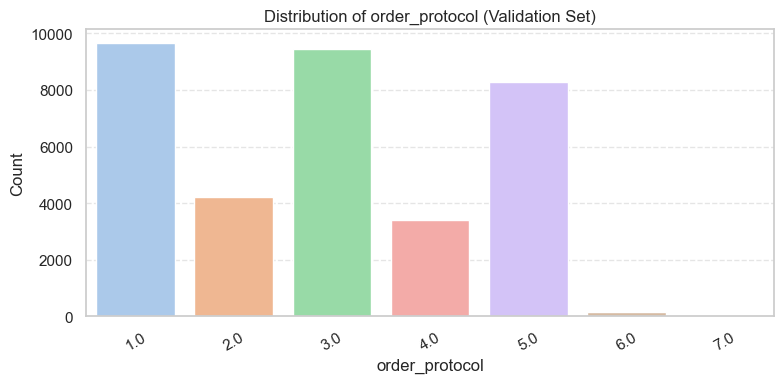

In [82]:
# Distribution of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=X_test[col], palette="pastel", legend=False)
    plt.title(f'Distribution of {col} (Validation Set)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

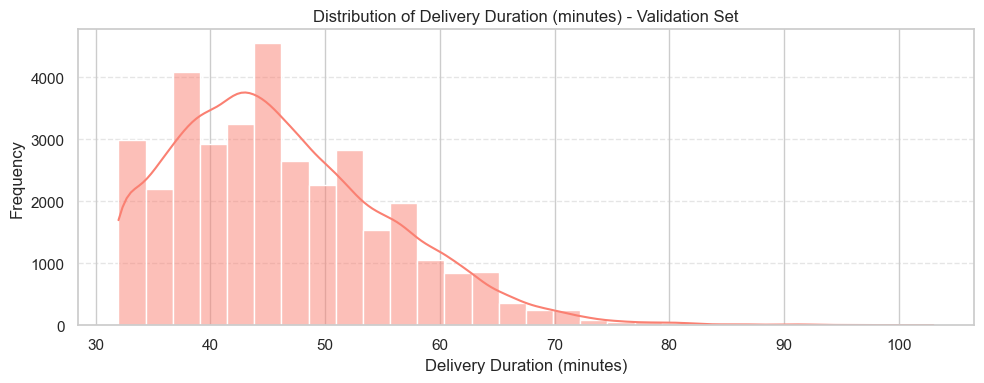

In [85]:
# Distribution of time_taken
plt.figure(figsize=(10, 4))
sns.histplot(y_test, kde=True, color='salmon', bins=30)
plt.title('Distribution of Delivery Duration (minutes) - Validation Set')
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

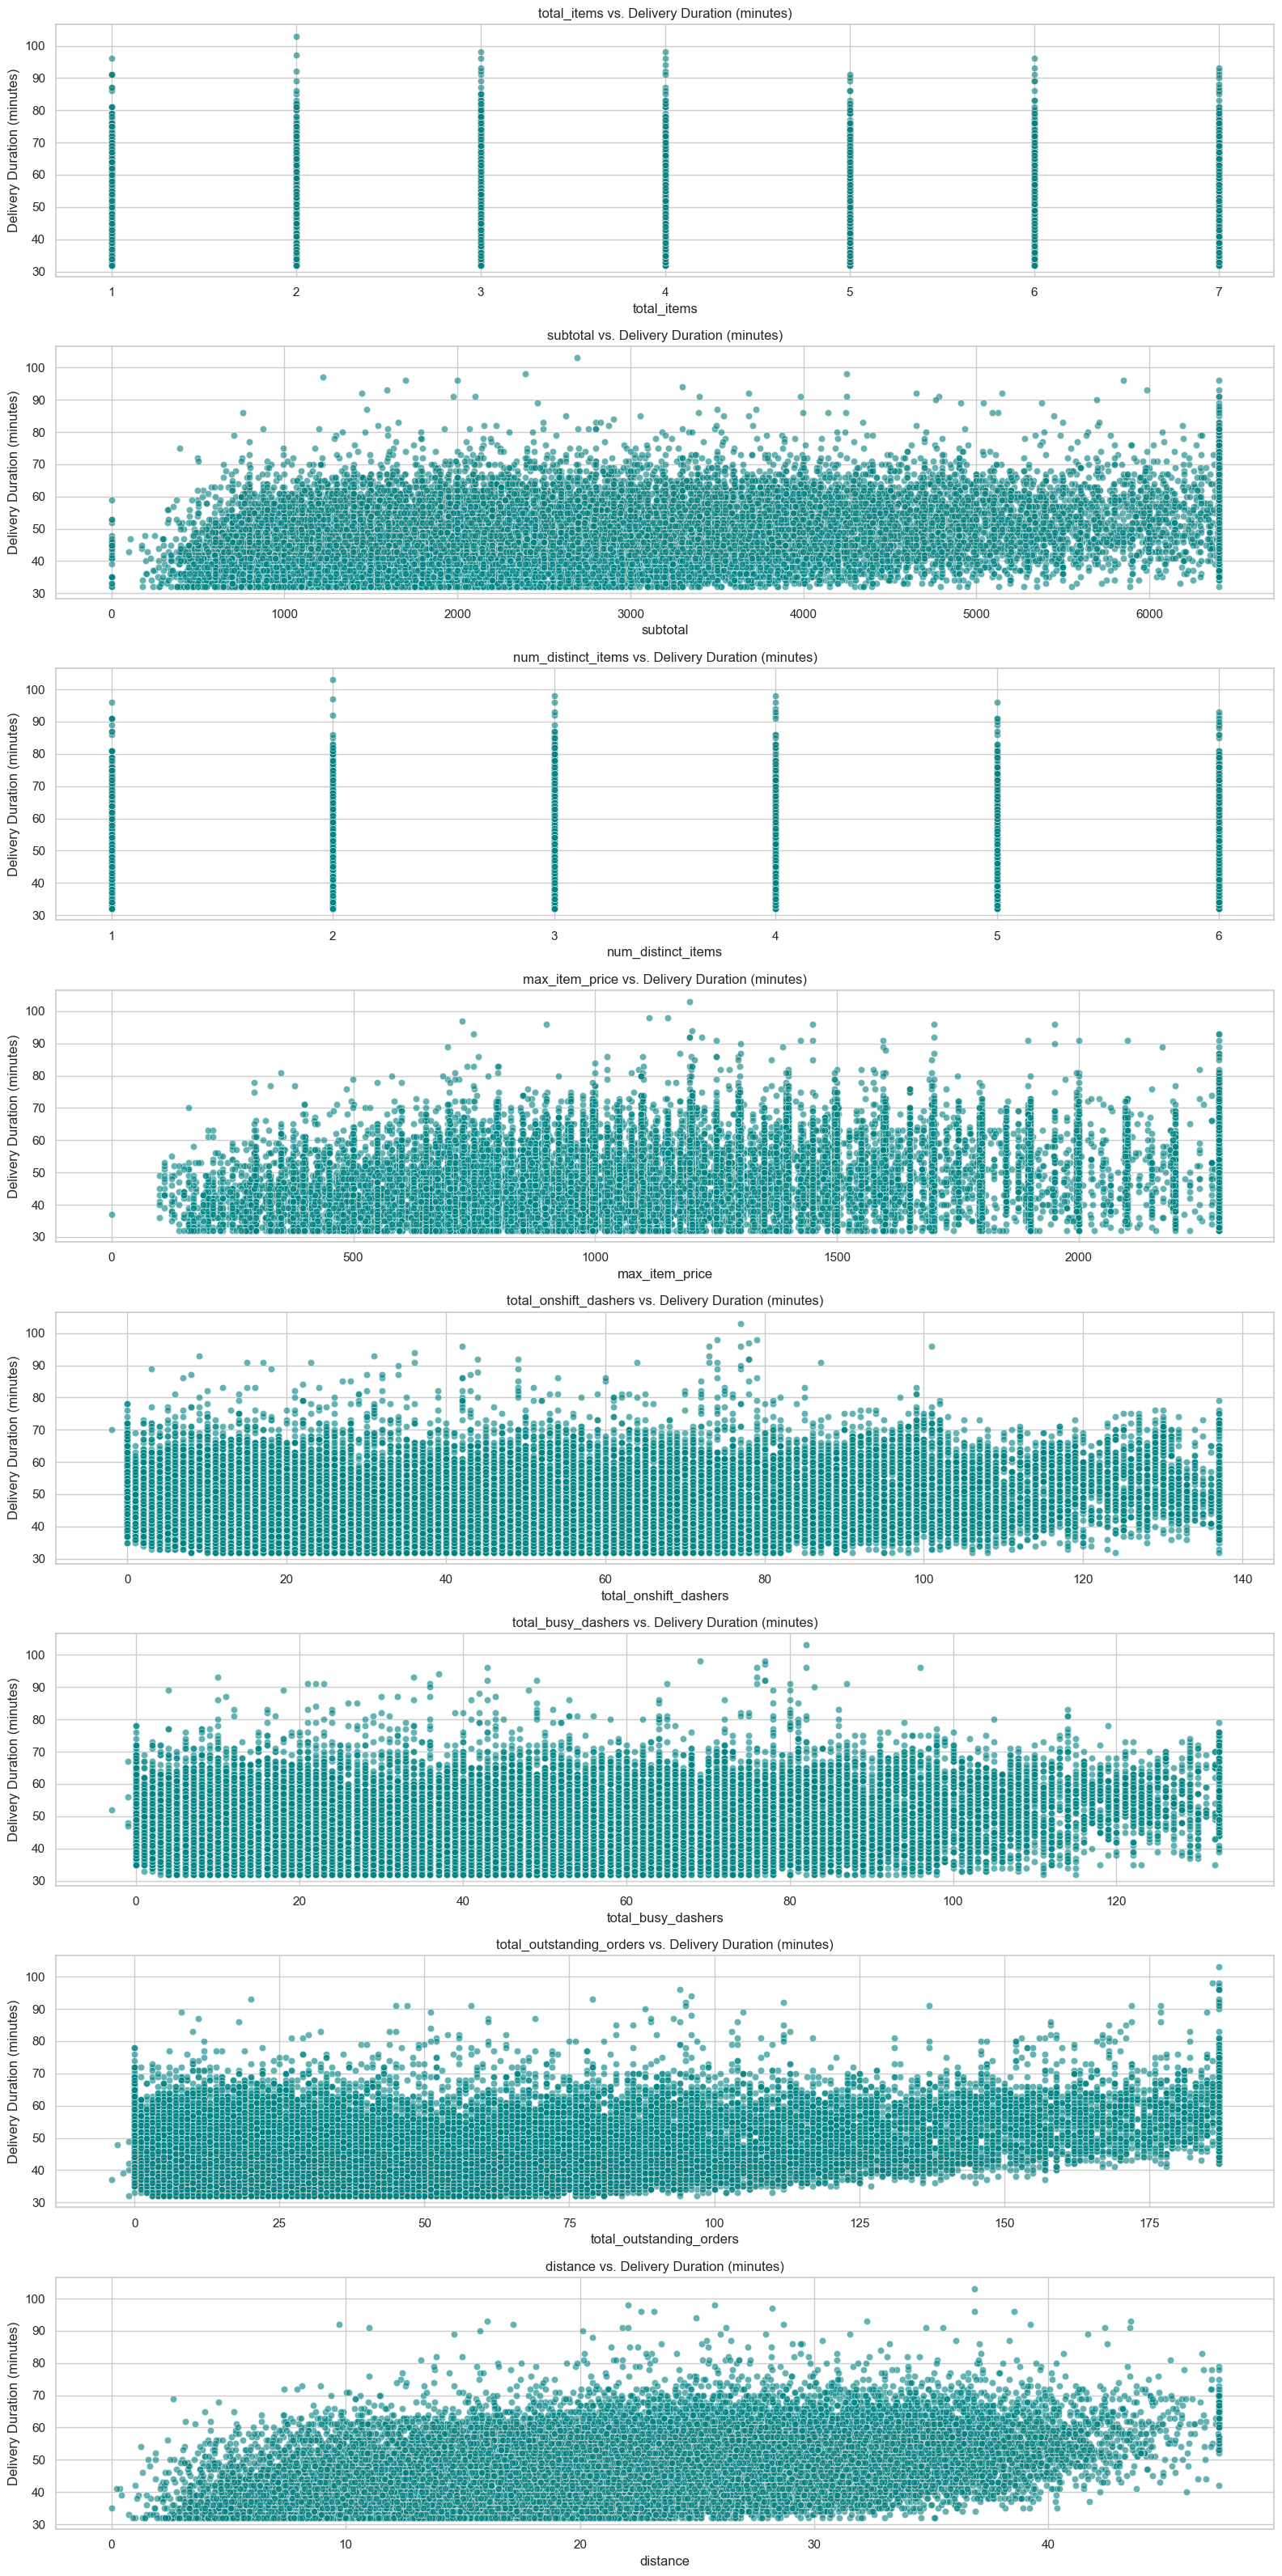

In [88]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(16, 4 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.scatterplot(x=X_test[col], y=y_test, color='teal', alpha=0.6)
    plt.title(f'{col} vs. Delivery Duration (minutes)')
    plt.xlabel(col)
    plt.ylabel('Delivery Duration (minutes)')

plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [91]:
# Drop the weakly correlated columns from training dataset
# Combining training features and target to compute correlation
train_combined = X_train.copy()
train_combined['delivery_duration_minutes'] = y_train

# Getting correlation matrix
cor_matrix = train_combined.corr()

# Sorting correlation of all features with the target
cor_target = cor_matrix['delivery_duration_minutes'].sort_values()

print("Correlation of features with delivery_duration_minutes:\n")
print(cor_target)

# Droping features with correlation less than 0.1 (weak correlation)
threshold = 0.1
weak_features = cor_target[abs(cor_target) < threshold].index.tolist()

# Removing target from the list
weak_features = [col for col in weak_features if col != 'delivery_duration_minutes']

print(f"\nDropping weak features: {weak_features}")

# Droping from both train and test
X_train.drop(columns=weak_features, inplace=True)
X_test.drop(columns=weak_features, inplace=True)


Correlation of features with delivery_duration_minutes:

order_hour                  -0.348551
order_protocol              -0.140559
total_onshift_dashers        0.173728
total_busy_dashers           0.208240
max_item_price               0.268523
total_items                  0.284677
num_distinct_items           0.294684
total_outstanding_orders     0.376249
subtotal                     0.418908
distance                     0.465638
delivery_duration_minutes    1.000000
Name: delivery_duration_minutes, dtype: float64

Dropping weak features: []


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [95]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [98]:
# Apply scaling to the numerical columns
scaler = StandardScaler()

# Combined with ColumnTransformer to apply only to numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_cols)
    ],
    remainder='passthrough'
)

# Applied scaling only to numerical columns
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# DataFrame:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=preprocessor.get_feature_names_out())
X_train_scaled_df.head()


num__total_items  num__subtotal  num__num_distinct_items  \
0         -1.149075      -1.166865                -1.250913   
1         -1.149075      -1.052738                -1.250913   
2          0.559700      -0.371242                 1.256041   
3         -0.579483      -0.152120                -0.415261   
4         -1.149075      -0.769053                -1.250913   

   num__max_item_price  num__total_onshift_dashers  num__total_busy_dashers  \
0            -0.838500                   -0.286914                -0.089125   
1            -0.300282                    1.891894                 0.937172   
2            -0.515569                   -1.129387                -1.208721   
3             0.569478                   -0.838879                -0.773323   
4             0.399401                    0.555558                 0.159675   

   num__total_outstanding_orders  num__distance  remainder__order_protocol  \
0                      -0.030878       0.971786                        2.0   
1                       1.149937       1.067993                        3.0   
2                      -0.995211      -0.420926                        3.0   
3                      -0.759048       1.329126                        1.0   
4                      -0.109599       1.113806                        1.0   

   remainder__order_hour  
0                   21.0  
1                    2.0  
2                   21.0  
3                    3.0  
4                   21.0

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [103]:
# Create/Initialise the model
lr_model = LinearRegression()

In [105]:
# Train the model using the training data
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [107]:
# Make predictions
# Predicting on training set
y_train_pred = lr_model.predict(X_train_scaled)

# Predicting on test set
y_test_pred = lr_model.predict(X_test_scaled)

In [109]:
# Find results for evaluation metrics
# I have used MAE, RMSE and R^2 for evaluation. 
print("Training Set Evaluation")
print("MAE :", mean_absolute_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R²  :", r2_score(y_train, y_train_pred))

print("\n Test Set Evaluation")
print("MAE :", mean_absolute_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R²  :", r2_score(y_test, y_test_pred))

Training Set Evaluation
MAE : 2.6010063501082223
RMSE: 3.53658771210205
R²  : 0.8497237751931723

 Test Set Evaluation
MAE : 2.6283460034255928
RMSE: 3.635255256269221
R²  : 0.8490175844293304


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [114]:
# Importing and Initializing RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Recreated the base model
lr_model = LinearRegression()

# Initialized RFE with estimator and desired number of features
rfe_selector = RFE(estimator=lr_model, n_features_to_select=8)

In [116]:
# Fitting RFE on scaled training data
rfe_selector.fit(X_train_scaled, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [118]:
# Identifing the selected features
selected_mask = rfe_selector.support_

# Getting the names of selected features
selected_features = np.array(preprocessor.get_feature_names_out())[selected_mask]

print("Selected Features (Top 8):")
print(selected_features)

Selected Features (Top 8):
['num__subtotal' 'num__num_distinct_items' 'num__max_item_price'
 'num__total_onshift_dashers' 'num__total_busy_dashers'
 'num__total_outstanding_orders' 'num__distance'
 'remainder__order_protocol']


In [120]:
# Filtering scaled data using selected features
X_train_rfe = X_train_scaled[:, selected_mask]
X_test_rfe = X_test_scaled[:, selected_mask]

# Training final Linear Regression model
final_lr_model = LinearRegression()
final_lr_model.fit(X_train_rfe, y_train)

# Predicting
y_test_pred_rfe = final_lr_model.predict(X_test_rfe)
y_train_pred_rfe = final_lr_model.predict(X_train_rfe)

In [122]:
#Evaluating Final RFE based model 
print("Training Set Evaluation (RFE Model)")
print("MAE :", mean_absolute_error(y_train, y_train_pred_rfe))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_rfe)))
print("R²  :", r2_score(y_train, y_train_pred_rfe))

print("\n Test Set Evaluation (RFE Model)")
print("MAE :", mean_absolute_error(y_test, y_test_pred_rfe))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_rfe)))
print("R²  :", r2_score(y_test, y_test_pred_rfe))

Training Set Evaluation (RFE Model)
MAE : 3.031301155054029
RMSE: 3.9824530638637867
R²  : 0.8094439503214866

 Test Set Evaluation (RFE Model)
MAE : 3.0564386055449937
RMSE: 4.074279201856932
R²  : 0.8103476968376296


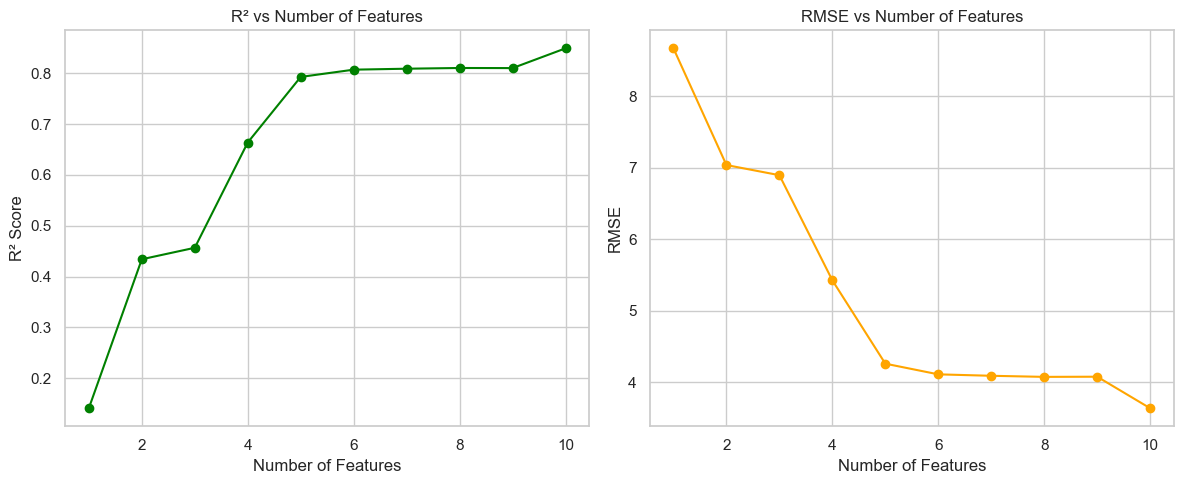

In [124]:
# Loop through the number of features and test the model
feature_counts = list(range(1, X_train_scaled.shape[1] + 1))
r2_scores = []
rmse_scores = []

for n_features in feature_counts:
    # Initializing RFE with n_features
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    rfe.fit(X_train_scaled, y_train)

    # Transforming the datasets
    X_train_rfe = X_train_scaled[:, rfe.support_]
    X_test_rfe = X_test_scaled[:, rfe.support_]

    # Training Linear Regression on selected features
    model = LinearRegression()
    model.fit(X_train_rfe, y_train)

    # Predicting on test set
    y_test_pred = model.predict(X_test_rfe)

    # Recording evaluation metrics
    r2_scores.append(r2_score(y_test, y_test_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Plotting R² and RMSE vs number of features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(feature_counts, r2_scores, marker='o', color='green')
plt.title('R² vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R² Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(feature_counts, rmse_scores, marker='o', color='orange')
plt.title('RMSE vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()

Final selected features:
['num__subtotal' 'num__num_distinct_items' 'num__max_item_price'
 'num__total_onshift_dashers' 'num__total_busy_dashers'
 'num__total_outstanding_orders' 'num__distance'
 'remainder__order_protocol']

Final Model Performance:
Training Set:
MAE  : 3.031301155054029
RMSE : 3.9824530638637867
R²   : 0.8094439503214866

Validation Set:
MAE  : 3.0564386055449937
RMSE : 4.074279201856932
R²   : 0.8103476968376296


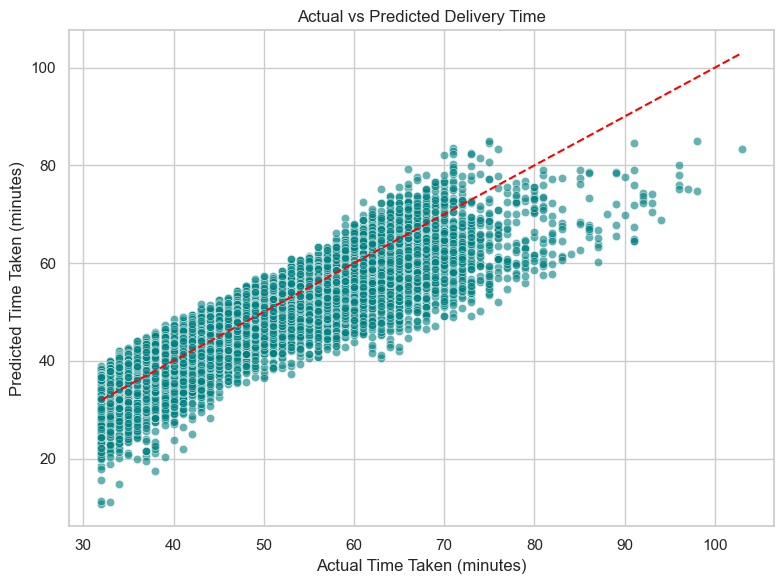

In [125]:
# Build the final model with selected number of features
final_rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
final_rfe.fit(X_train_scaled, y_train)

selected_mask = final_rfe.support_
selected_feature_names = np.array(preprocessor.get_feature_names_out())[selected_mask]
print("Final selected features:")
print(selected_feature_names)

X_train_final = X_train_scaled[:, selected_mask]
X_test_final = X_test_scaled[:, selected_mask]

final_model = LinearRegression()
final_model.fit(X_train_final, y_train)

y_train_pred_final = final_model.predict(X_train_final)
y_test_pred_final = final_model.predict(X_test_final)

print("\nFinal Model Performance:")
print("Training Set:")
print("MAE  :", mean_absolute_error(y_train, y_train_pred_final))
print("RMSE :", np.sqrt(mean_squared_error(y_train, y_train_pred_final)))
print("R²   :", r2_score(y_train, y_train_pred_final))

print("\nValidation Set:")
print("MAE  :", mean_absolute_error(y_test, y_test_pred_final))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_test_pred_final)))
print("R²   :", r2_score(y_test, y_test_pred_final))

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred_final, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Time Taken (minutes)")
plt.ylabel("Predicted Time Taken (minutes)")
plt.title("Actual vs Predicted Delivery Time")
plt.grid(True)
plt.tight_layout()
plt.show()

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

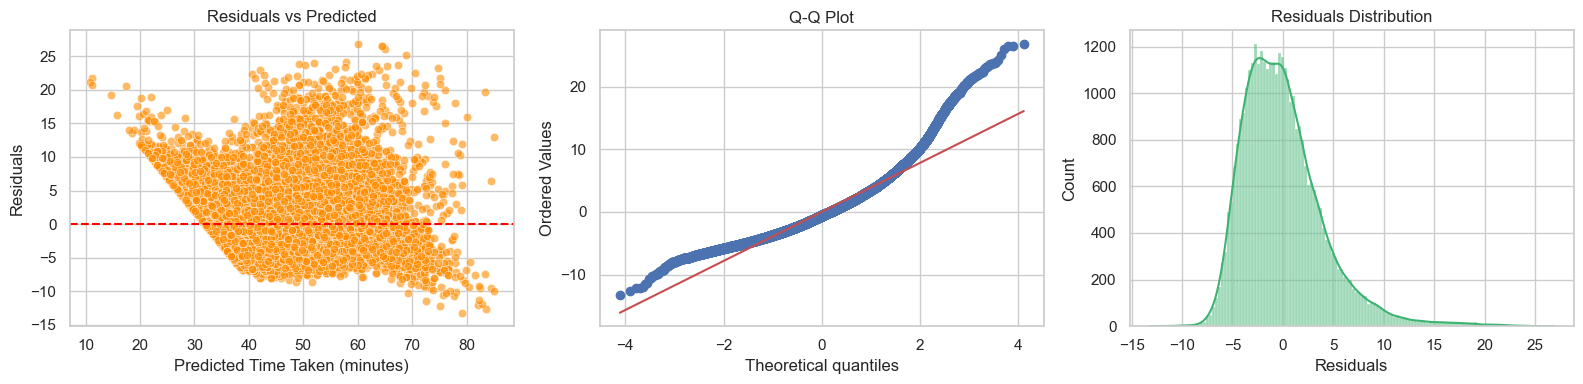

In [130]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats

# Computing residuals
residuals = y_test - y_test_pred_final

# Setting up plots
plt.figure(figsize=(16, 4))

# Residuals vs Predicted
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test_pred_final, y=residuals, color='darkorange', alpha=0.6)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Time Taken (minutes)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")

# Q-Q Plot (Normal Q-Q)
plt.subplot(1, 3, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")


# Histogram of Residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True, color='mediumseagreen')
plt.xlabel("Residuals")
plt.title("Residuals Distribution")


plt.tight_layout()
plt.savefig("Residual Analysis using plots.png",bbox_inches='tight')
plt.show()

[Your inferences here:]

In the first graph , the residuals spread increases with predicted values. This violates the constant variance assumpation of linear regression. Model errors increases with delivert time, which may be due to non-linear relationships not captured by linear regression. 

In the second graph, the residials diviate significantly from the 45-degree line. Residuals are not normally distributed. This affects the validity of confidence intervals and p-values in a linear model. 

In the third graph, the residual distribution is skewed and is not normal with a peak just below 0 and a long right tail. This is neither symmetric nor bell-shaped. There may be outliers or skew in the original target variable (time_taken) or in features.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [135]:
# Compare the scaled vs unscaled features used in the final model


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [138]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> There are 5 categorical variables in the data. From my analysis of the categorical variables in the data , i can infer their effects on the dependent variable. Deliveries from Fast Food store were consistently faster than from categories like Alcohol or Supermarket. Certain protocls like protocol_0 were associated with shorter delivery times, and protocol_5 were weakly correlated and dropped during feature selections. Weekends showed a positive impact on delivery time i.e., they increased delivery durations due to higher order volumes and lower dasher availability. Orders during peak hours took slightly longer. Weekdays vs. weekends shows noticiable time difference captured through is_weekend.  



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>20% of the data is allocated to the test set.The remaining 80% is used as the training set for building the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Based on the heatmap of the correlation matrix generated during the EDA, the feature with the highest correlation with the target variable time_taken is total_items. 



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Used boxplots and statistical thresholds to identify outliers in the dataset, focusing on numerical features like: time_taken (target variable) , total_items , subtotal & num_distinct_items. Applied IQR-based capping.Capping preserves data structure while minimizing the skewness/outlier impact.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Based on final model, the top 3 features which are significantly affecting the delivery time are - total_items, subtotal and order_protocol. 



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear regression is a supervised learning algorithm used to model the relationship between a dependent variable (target) and one or more independent variables (features). The goal is to fit a linear equation of the form:

> y=β0+β1x1+β2x2+⋯+βnxn+ε

>Where:
>* y is the predicted value (e.g., delivery time),
>* 𝑥1,𝑥2,...,𝑥𝑛 are input features,
>* β0 is the intercept,
>* βi are the coefficients (slopes),
>* ε is the error term.

>The algorithm uses Ordinary Least Squares (OLS) to find the coefficients that minimize the Sum of Squared Errors (SSE) between predicted and actual values. It assumes linearity, independence, constant variance of residuals (homoscedasticity), and no multicollinearity among predictors.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple Linear Regression involves one independent variable and models the relationship between that variable and the target.
>y=β0+β1x
>Multiple Linear Regression involves two or more independent variables to predict the target.
>y=β0+β1x1+β2x2+⋯+βnxn
>The key difference lies in the number of predictors used to estimate the target variable.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function quantifies the error between predicted and actual values. In linear regression, the most commonly used cost function is Mean Squared Error (MSE). 
The objective is to find the coefficients that minimize the MSE. This is typically done using the Ordinary Least Squares (OLS) method or Gradient Descent. Minimizing the cost function improves the accuracy of the model.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting occurs when the model learns not only the pattern but also the noise in the training data. It performs well on training data but poorly on unseen data.
Underfitting occurs when the model is too simple to capture the underlying pattern in the data, resulting in poor performance on both training and test sets.
Overfitting → High variance
and Underfitting → High bias



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots show the difference between predicted and actual values (residuals). They help diagnose if model assumptions are violated:
Random scatter in residuals suggests the linear model is appropriate.
Patterns (e.g., curves or funnel shapes) indicate issues like non-linearity or heteroscedasticity.
Q-Q plots help check if residuals are normally distributed.
Histogram of residuals shows skewness or outliers.
Together, these plots help validate assumptions and identify potential improvements to the model.